In [1]:
import pandas as pd
import numpy as np
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

In [3]:
df = pd.read_csv("household_water_usage.csv")
df.head()

,Day,Month,Temperature (°C),Family Size,Watering Garden (Liters),Dishwashing (Liters),Laundry (Liters),Cooking (Liters),Showers (Liters),Toilet Flush (Liters),Total Water Usage (Liters)
0,7,1,10.131169,1,23.295947,13.357589,68.813471,13.111906,132.475436,47.858261,298.912610
1,20,12,22.966416,6,2.440078,18.092488,43.760312,15.653642,496.187868,274.213975,850.348363
2,29,5,13.162983,3,87.009887,11.712606,25.467062,9.715252,394.908788,80.333759,609.147354
3,15,5,25.345690,5,2.126941,25.935086,84.087158,12.067518,685.854123,206.073101,1016.143927
4,11,11,35.209848,6,87.470167,38.098171,3.842635,17.324553,224.969467,174.320576,546.025570


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Day                         365 non-null    int64  
 1   Month                       365 non-null    int64  
 2   Temperature (°C)            365 non-null    float64
 3   Family Size                 365 non-null    int64  
 4   Watering Garden (Liters)    365 non-null    float64
 5   Dishwashing (Liters)        365 non-null    float64
 6   Laundry (Liters)            365 non-null    float64
 7   Cooking (Liters)            365 non-null    float64
 8   Showers (Liters)            365 non-null    float64
 9   Toilet Flush (Liters)       365 non-null    float64
 10  Total Water Usage (Liters)  365 non-null    float64
dtypes: float64(8), int64(3)
memory usage: 31.5 KB


In [5]:
df.describe()

,Day,Month,Temperature (°C),Family Size,Watering Garden (Liters),Dishwashing (Liters),Laundry (Liters),Cooking (Liters),Showers (Liters),Toilet Flush (Liters),Total Water Usage (Liters)
count,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000
mean,16.389041,6.326027,22.697792,3.375342,51.214380,24.951133,50.580674,12.445401,297.739912,103.359828,540.291329
std,9.429431,3.505178,9.706133,1.738050,29.676636,8.698151,28.969059,4.237770,199.960268,72.633598,253.428478
min,1.000000,1.000000,5.090826,1.000000,0.638587,10.148199,0.321826,5.023477,32.106284,10.615796,138.026314
25%,8.000000,3.000000,14.483517,2.000000,23.605046,17.175403,24.954620,9.200560,135.198077,41.495481,337.238688
50%,17.000000,6.000000,23.544401,3.000000,51.977395,24.915243,52.339091,12.333467,255.589797,83.143428,501.193100
75%,25.000000,9.000000,30.798525,5.000000,77.092184,32.106212,75.939826,15.859596,408.662493,153.491333,691.404744
max,31.000000,12.000000,39.919242,6.000000,99.793411,39.982412,99.834751,19.931563,893.756089,296.366017,1327.007693


In [6]:
df.shape

(365, 11)

In [7]:
df.columns

Index(['Day', 'Month', 'Temperature (°C)', 'Family Size',
       'Watering Garden (Liters)', 'Dishwashing (Liters)', 'Laundry (Liters)',
       'Cooking (Liters)', 'Showers (Liters)', 'Toilet Flush (Liters)',
       'Total Water Usage (Liters)'],
      dtype='object')

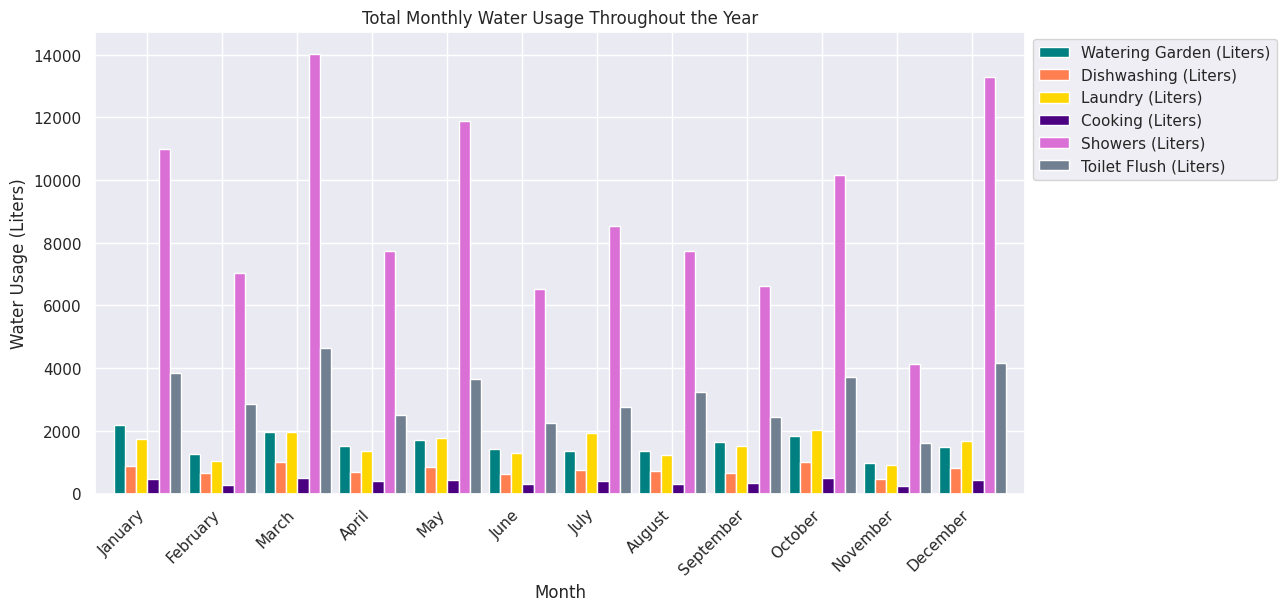

In [8]:
colors = ['#008080', '#FF7F50', '#FFD700', '#4B0082', '#DA70D6', '#708090']
fig, ax = plt.subplots(figsize=(12, 6))
months = [
    "January",
    "February",
    "March",
    "April",
    "May",
    "June",
    "July",
    "August",
    "September",
    "October",
    "November",
    "December"
]
df.groupby("Month").sum().drop(
    ["Family Size", "Temperature (°C)", "Day", "Total Water Usage (Liters)"], axis=1).plot(
    kind="bar", figsize=(12, 6), width=0.9, color=colors, ax=ax)

ax.set_title("Total Monthly Water Usage Throughout the Year")
ax.set_xlabel("Month")
ax.set_ylabel("Water Usage (Liters)")
ax.set_xticklabels(months, rotation=45, ha='right')

ax.legend(loc='upper left', bbox_to_anchor=(1, 1))

plt.show()

Text(0, 0.5, 'Water Usage (Liters)')

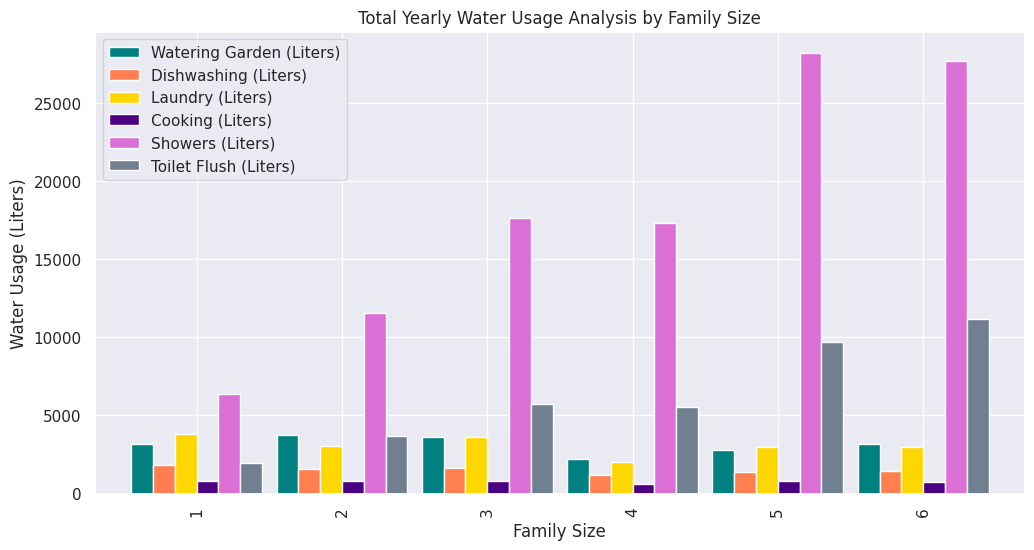

In [ ]:
df.groupby("Family Size").sum().drop(
    ["Month", "Temperature (°C)", "Day", "Total Water Usage (Liters)"], axis=1).plot(
    kind="bar", figsize=(12, 6), width=0.9, color=colors)

plt.title("Total Yearly Water Usage Analysis by Family Size")
plt.xlabel("Family Size")
plt.ylabel("Water Usage (Liters)")

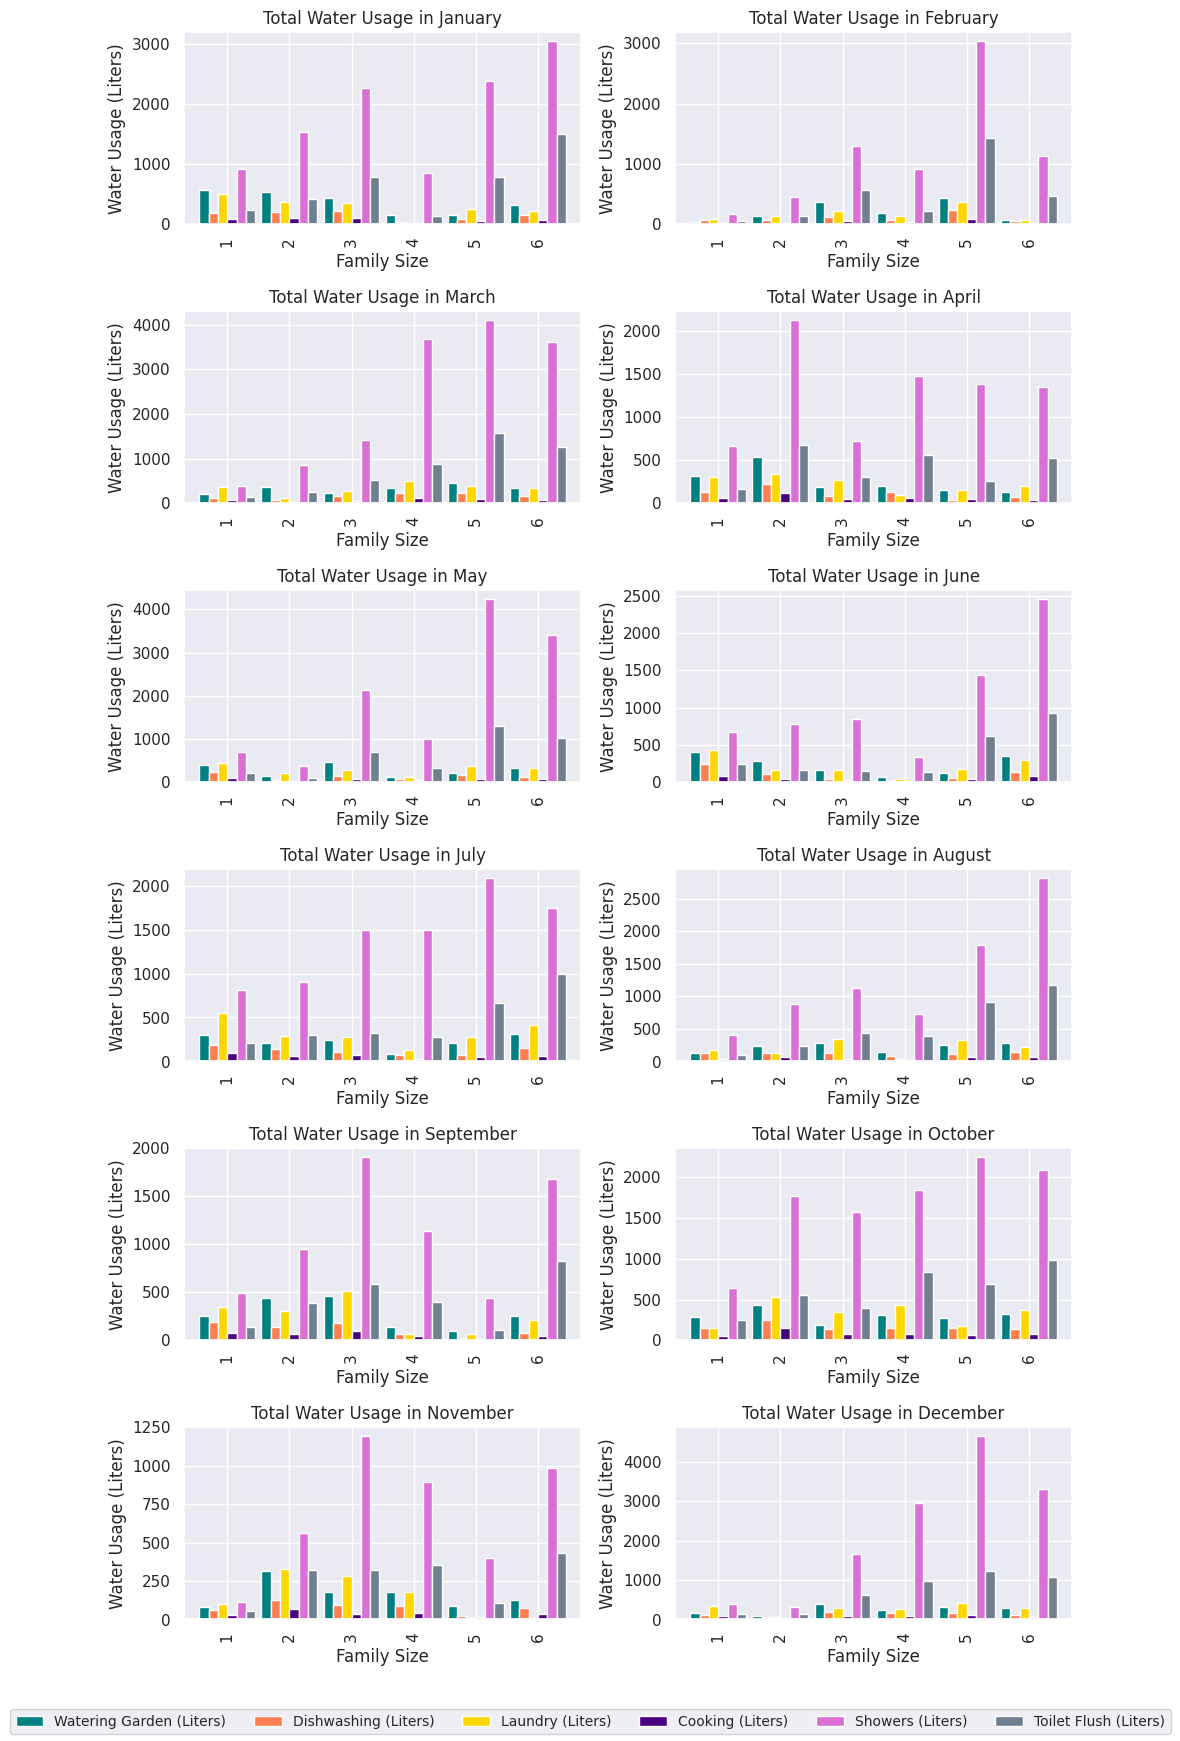

In [ ]:
import matplotlib.pyplot as plt

colors = ['#008080', '#FF7F50', '#FFD700', '#4B0082', '#DA70D6', '#708090']

fig, axs = plt.subplots(6, 2, figsize=(10, 18))

axs = axs.flatten()
handles = []
labels = []

for month in range(1, 13):
    df2 = df[df["Month"] == month]

    plot = df2.groupby("Family Size").sum().drop(
        ["Month", "Temperature (°C)", "Day", "Total Water Usage (Liters)"], axis=1).plot(
        kind="bar", width=0.9, color=colors, ax=axs[month-1])

    axs[month-1].set_title(f"Total Water Usage in {months[month-1]}")
    axs[month-1].set_xlabel("Family Size")
    axs[month-1].set_ylabel("Water Usage (Liters)")

    if month == 1:
        handles, labels = axs[month-1].get_legend_handles_labels()

    axs[month-1].get_legend().remove()

fig.legend(handles, labels, loc='lower center', ncol=len(labels), fontsize='small')

plt.tight_layout(rect=[0, 0.03, 1, 0.97])
plt.show()


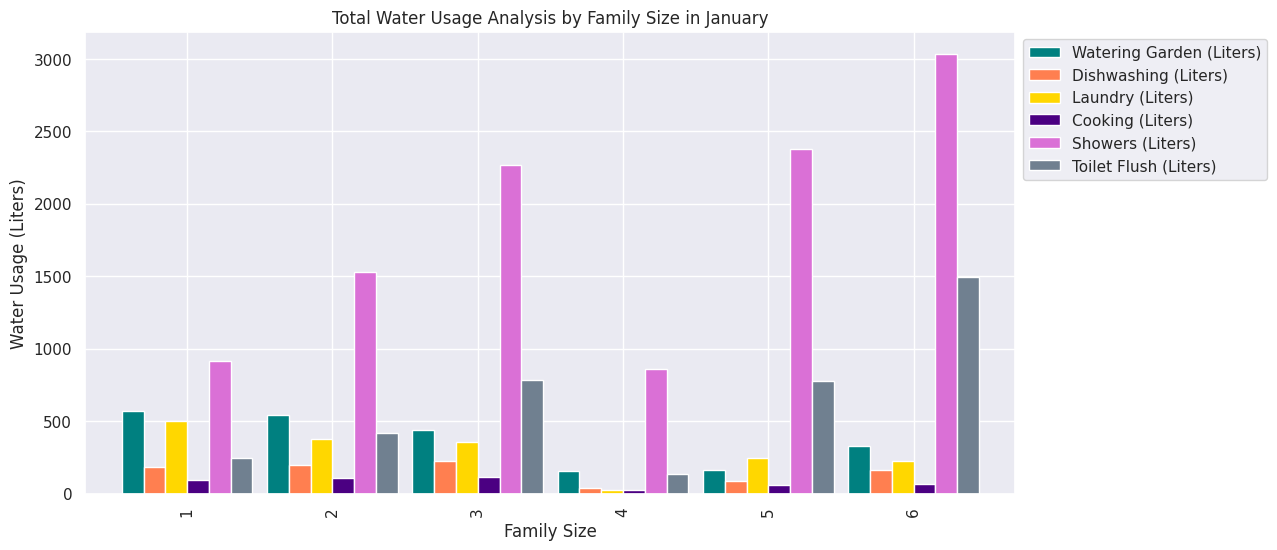

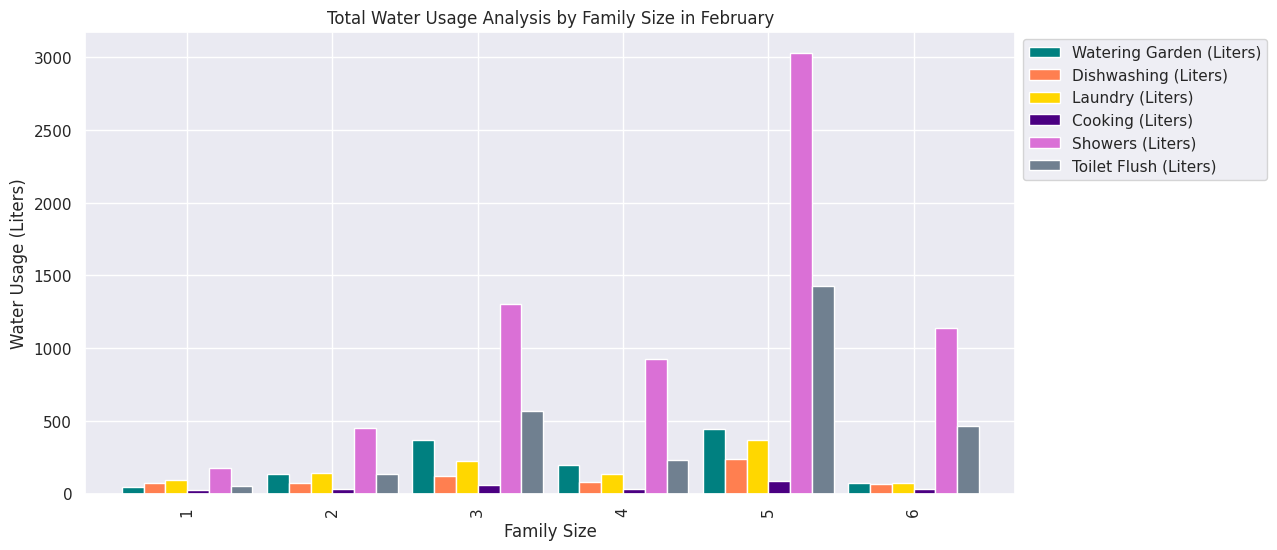

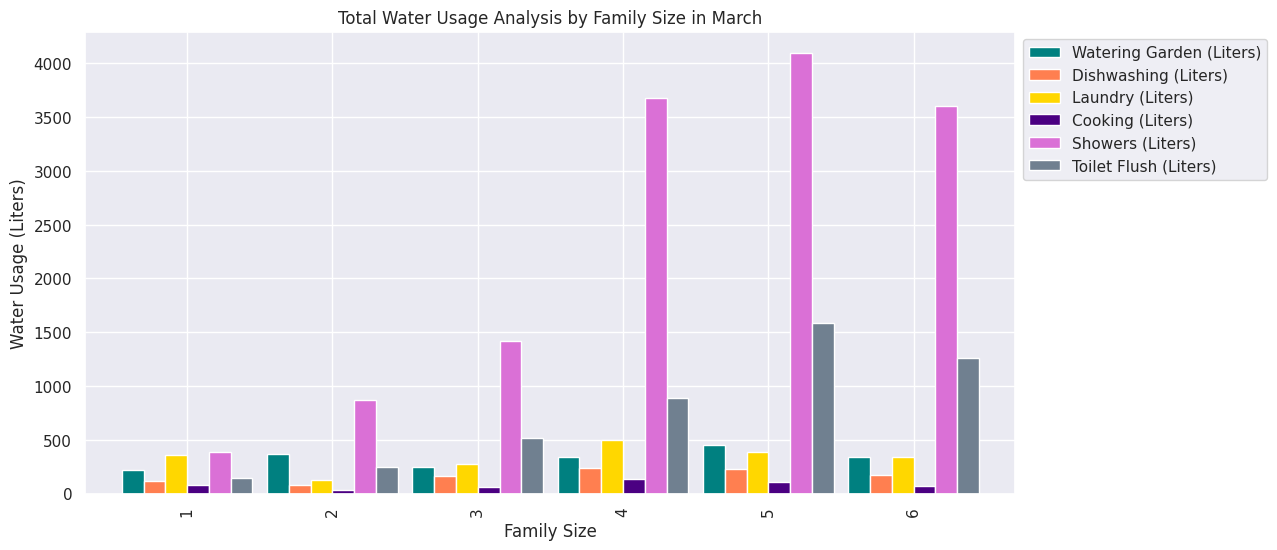

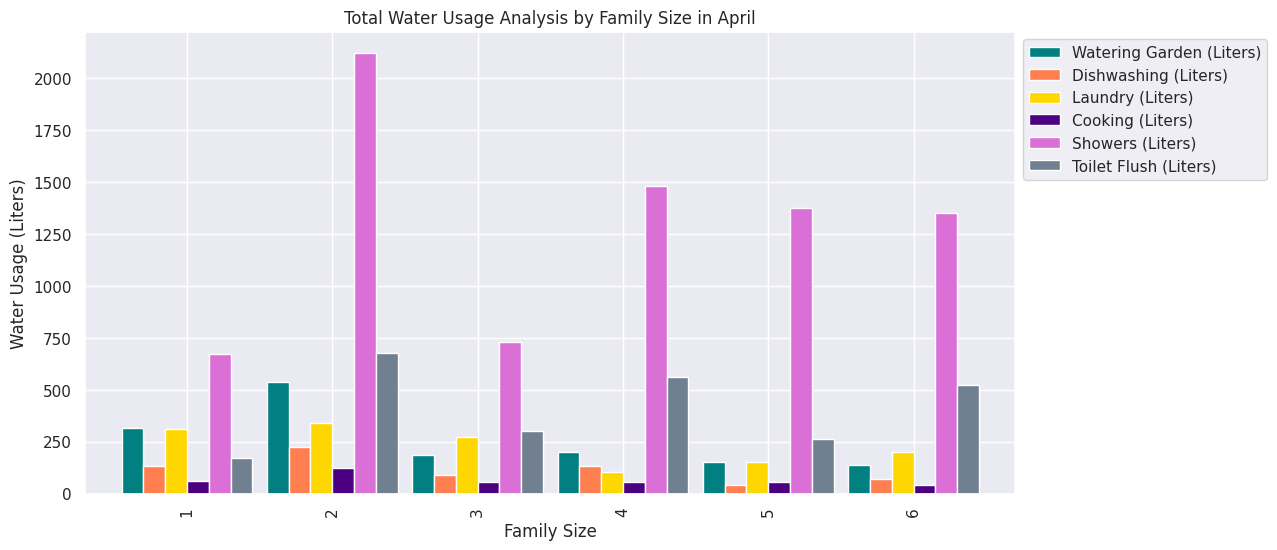

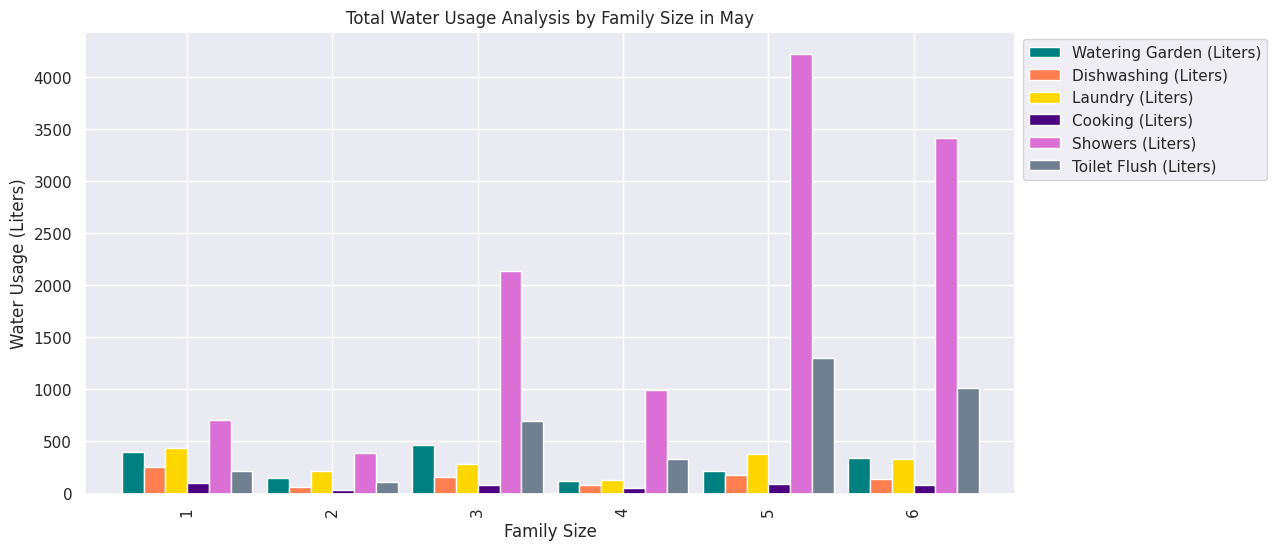

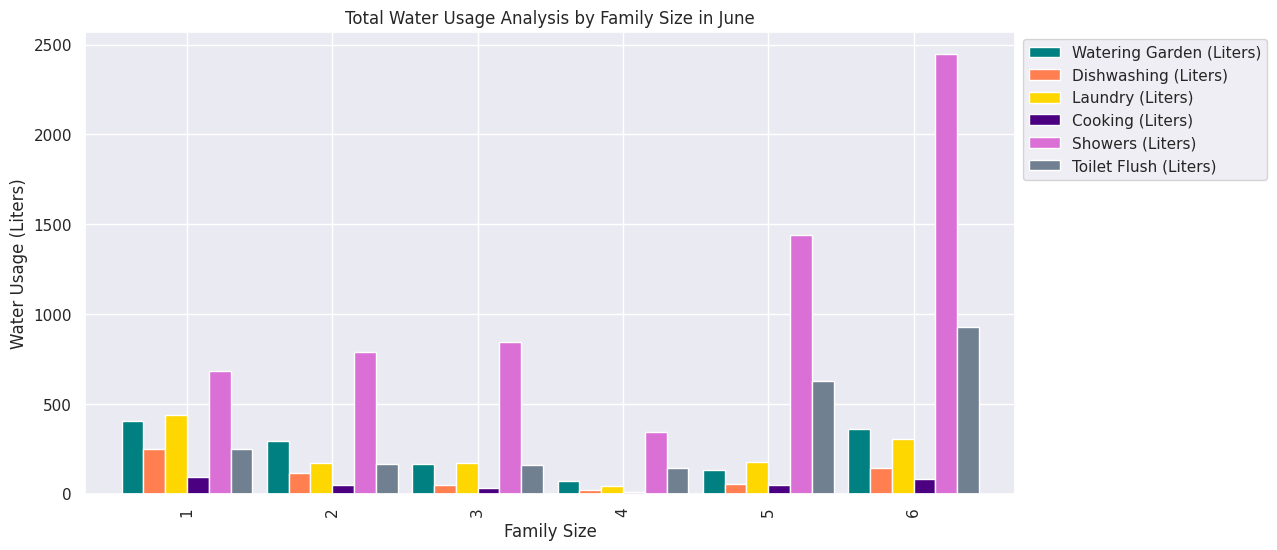

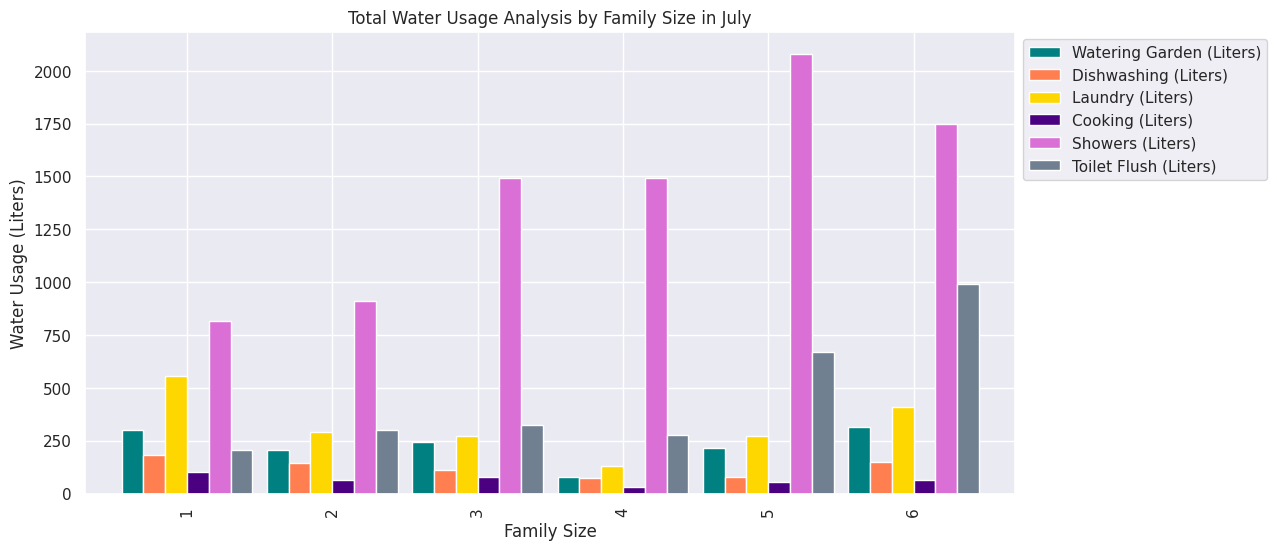

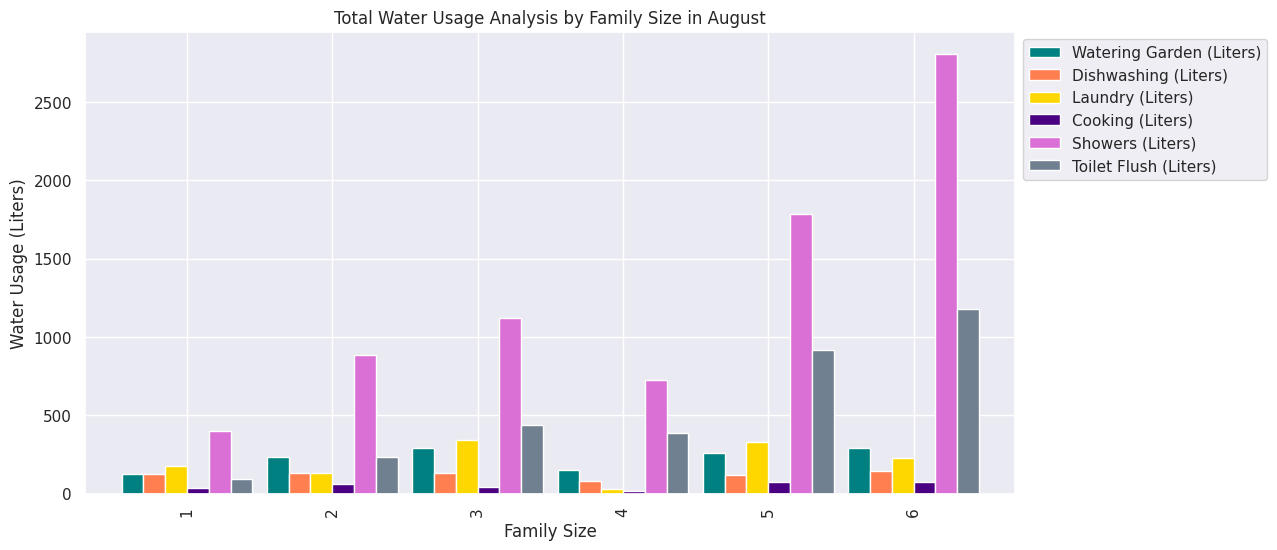

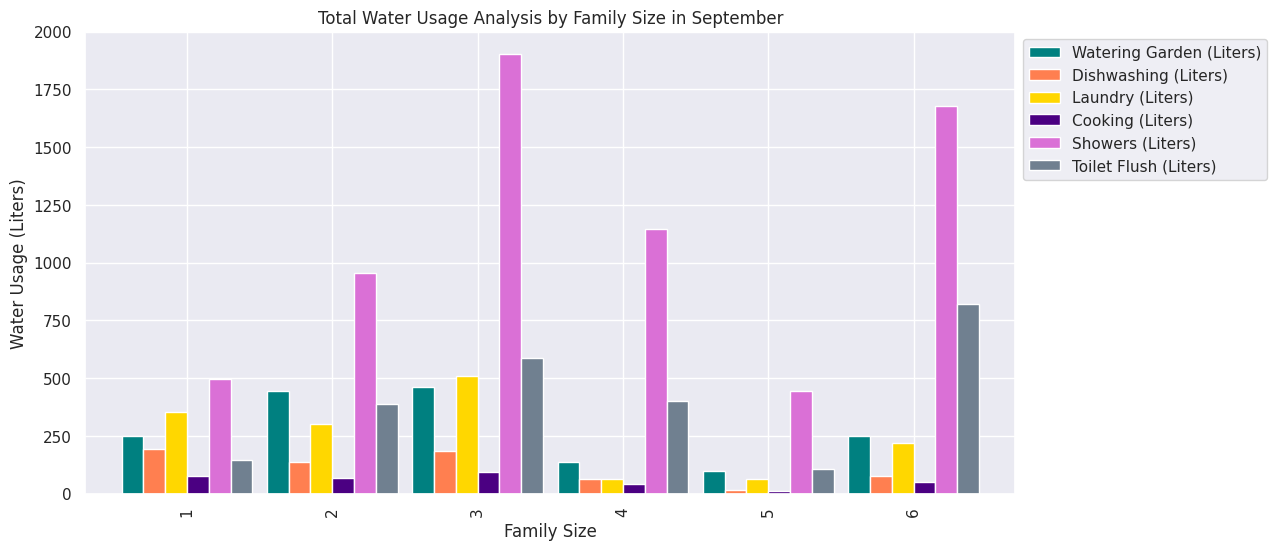

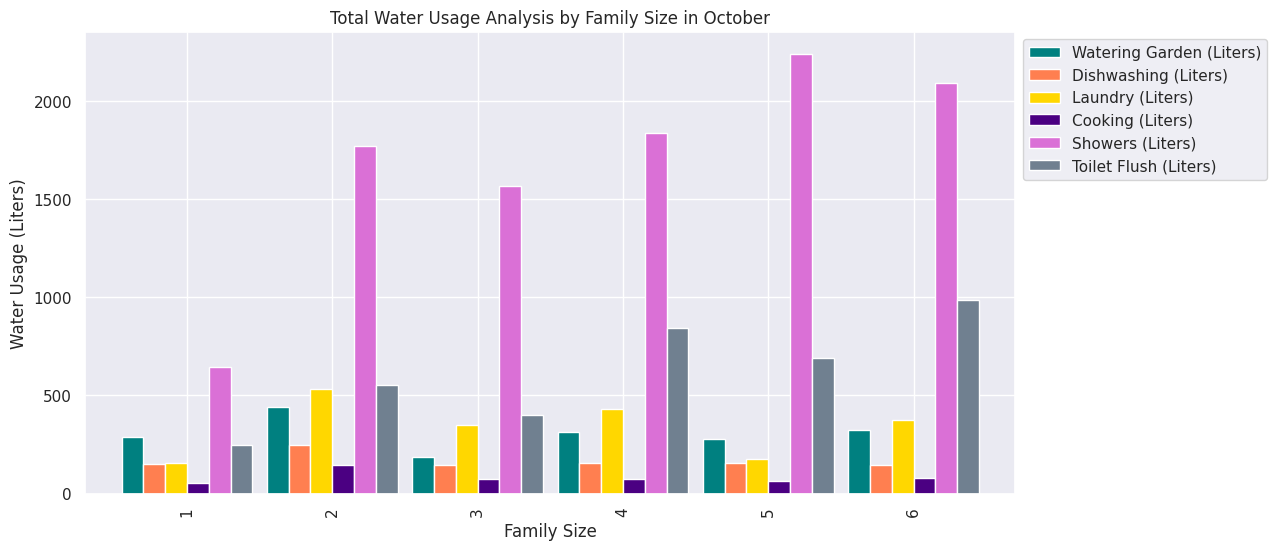

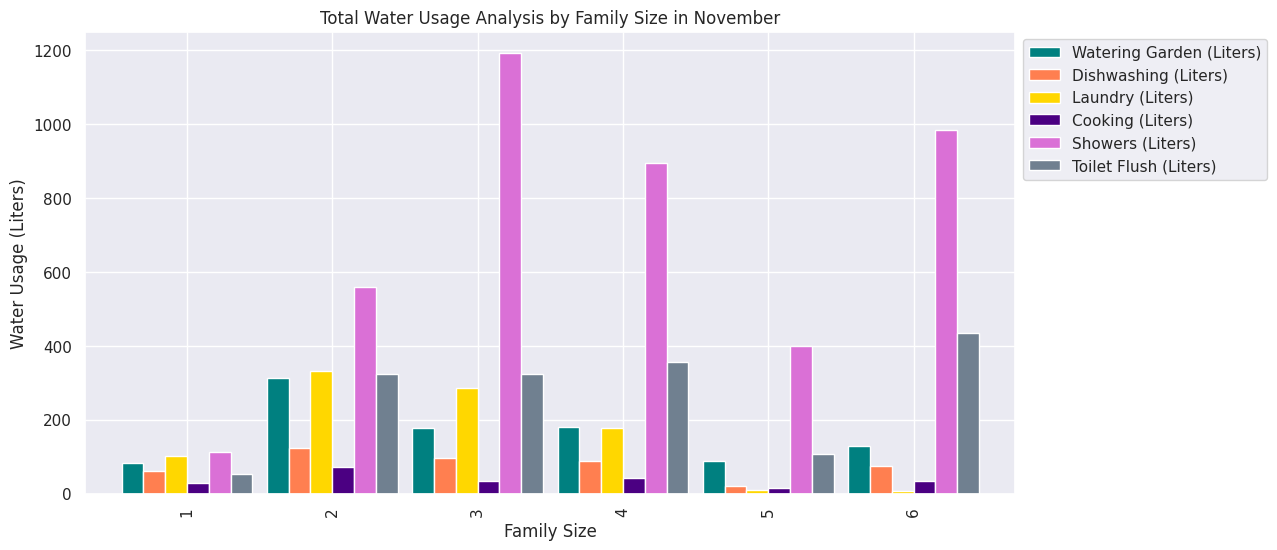

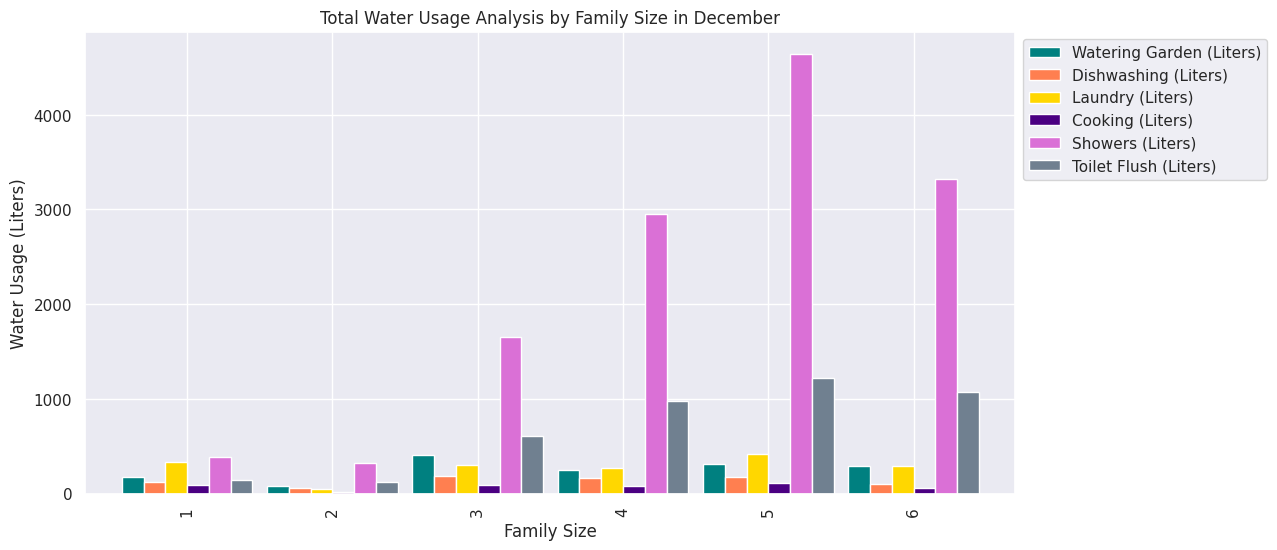

In [ ]:
for month in range(1, 13):
  colors = ['#008080', '#FF7F50', '#FFD700', '#4B0082', '#DA70D6', '#708090']
  df2 = df[df["Month"] == month]
  fig, ax = plt.subplots(figsize=(12, 6))

  df2.groupby("Family Size").sum().drop(
      ["Month", "Temperature (°C)", "Day", "Total Water Usage (Liters)"], axis=1).plot(
      kind="bar", figsize=(12, 6), width=0.9, color=colors, ax=ax)

  ax.set_title(f"Total Water Usage Analysis by Family Size in {months[month-1]}")
  ax.set_xlabel("Family Size")
  ax.set_ylabel("Water Usage (Liters)")

  ax.legend(loc='upper left', bbox_to_anchor=(1, 1))

  plt.show()

In [ ]:
df.head()

,Day,Month,Temperature (°C),Family Size,Watering Garden (Liters),Dishwashing (Liters),Laundry (Liters),Cooking (Liters),Showers (Liters),Toilet Flush (Liters),Total Water Usage (Liters)
0,7,1,10.131169,1,23.295947,13.357589,68.813471,13.111906,132.475436,47.858261,298.912610
1,20,12,22.966416,6,2.440078,18.092488,43.760312,15.653642,496.187868,274.213975,850.348363
2,29,5,13.162983,3,87.009887,11.712606,25.467062,9.715252,394.908788,80.333759,609.147354
3,15,5,25.345690,5,2.126941,25.935086,84.087158,12.067518,685.854123,206.073101,1016.143927
4,11,11,35.209848,6,87.470167,38.098171,3.842635,17.324553,224.969467,174.320576,546.025570


In [9]:
df.corrwith(df["Total Water Usage (Liters)"])

,0
Day,0.080583
Month,-0.012198
Temperature (°C),-0.015321
Family Size,0.794882
Watering Garden (Liters),0.097311
Dishwashing (Liters),-0.029144
Laundry (Liters),0.083525
Cooking (Liters),0.043438
Showers (Liters),0.958236
Toilet Flush (Liters),0.778997


In [ ]:
df.head()

,Day,Month,Temperature (°C),Family Size,Watering Garden (Liters),Dishwashing (Liters),Laundry (Liters),Cooking (Liters),Showers (Liters),Toilet Flush (Liters),Total Water Usage (Liters)
0,7,1,10.131169,1,23.295947,13.357589,68.813471,13.111906,132.475436,47.858261,298.912610
1,20,12,22.966416,6,2.440078,18.092488,43.760312,15.653642,496.187868,274.213975,850.348363
2,29,5,13.162983,3,87.009887,11.712606,25.467062,9.715252,394.908788,80.333759,609.147354
3,15,5,25.345690,5,2.126941,25.935086,84.087158,12.067518,685.854123,206.073101,1016.143927
4,11,11,35.209848,6,87.470167,38.098171,3.842635,17.324553,224.969467,174.320576,546.025570


In [74]:
df2 = df.drop_duplicates(subset=["Day", "Month"])
df2 = df2.sort_values(["Month", "Day"], ascending=[True, True])
df2.head()

,Day,Month,Temperature (°C),Family Size,Watering Garden (Liters),Dishwashing (Liters),Laundry (Liters),Cooking (Liters),Showers (Liters),Toilet Flush (Liters),Total Water Usage (Liters)
89,2,1,5.478519,3,7.613086,25.572454,93.738807,16.147898,369.124614,53.428872,565.625731
19,3,1,25.001556,3,73.758230,23.642196,8.479202,14.767214,190.353554,69.862924,380.863319
85,4,1,24.917851,3,49.587574,28.584710,65.616184,9.518979,379.425063,117.477727,650.210237
255,5,1,23.544401,5,93.621225,16.255315,56.533025,7.316896,154.704954,184.574334,513.005750
0,7,1,10.131169,1,23.295947,13.357589,68.813471,13.111906,132.475436,47.858261,298.912610


In [75]:
average_usage = {
    'Dishwashing': 12,
    'Laundry': 32,
    'Cooking': 5,
    'Showers': 70,
    'Toilet Flush': 10,
    'Watering Garden': 20
}

df2['Dishwashing (Times)'] = (df2['Dishwashing (Liters)'] / average_usage['Dishwashing']).astype(int)
df2['Laundry (Times)'] = (df2['Laundry (Liters)'] / average_usage['Laundry']).astype(int)
df2['Cooking (Times)'] = (df2['Cooking (Liters)'] / average_usage['Cooking']).astype(int)
df2['Showers (Times)'] = (df2['Showers (Liters)'] / average_usage['Showers']).astype(int)
df2['Toilet Flush (Times)'] = (df2['Toilet Flush (Liters)'] / average_usage['Toilet Flush']).astype(int)
df2['Watering Garden (Times)'] = (df2['Watering Garden (Liters)'] / average_usage['Watering Garden']).astype(int)

df2.head()


,Day,Month,Temperature (°C),Family Size,Watering Garden (Liters),Dishwashing (Liters),Laundry (Liters),Cooking (Liters),Showers (Liters),Toilet Flush (Liters),Total Water Usage (Liters),Dishwashing (Times),Laundry (Times),Cooking (Times),Showers (Times),Toilet Flush (Times),Watering Garden (Times)
89,2,1,5.478519,3,7.613086,25.572454,93.738807,16.147898,369.124614,53.428872,565.625731,2,2,3,5,5,0
19,3,1,25.001556,3,73.758230,23.642196,8.479202,14.767214,190.353554,69.862924,380.863319,1,0,2,2,6,3
85,4,1,24.917851,3,49.587574,28.584710,65.616184,9.518979,379.425063,117.477727,650.210237,2,2,1,5,11,2
255,5,1,23.544401,5,93.621225,16.255315,56.533025,7.316896,154.704954,184.574334,513.005750,1,1,1,2,18,4
0,7,1,10.131169,1,23.295947,13.357589,68.813471,13.111906,132.475436,47.858261,298.912610,1,2,2,1,4,1


In [76]:
df2.columns

Index(['Day', 'Month', 'Temperature (°C)', 'Family Size',
       'Watering Garden (Liters)', 'Dishwashing (Liters)', 'Laundry (Liters)',
       'Cooking (Liters)', 'Showers (Liters)', 'Toilet Flush (Liters)',
       'Total Water Usage (Liters)', 'Dishwashing (Times)', 'Laundry (Times)',
       'Cooking (Times)', 'Showers (Times)', 'Toilet Flush (Times)',
       'Watering Garden (Times)'],
      dtype='object')

In [77]:
df2.describe()

,Day,Month,Temperature (°C),Family Size,Watering Garden (Liters),Dishwashing (Liters),Laundry (Liters),Cooking (Liters),Showers (Liters),Toilet Flush (Liters),Total Water Usage (Liters),Dishwashing (Times),Laundry (Times),Cooking (Times),Showers (Times),Toilet Flush (Times),Watering Garden (Times)
count,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000
mean,16.165289,6.471074,22.888857,3.268595,53.762280,24.838422,52.188513,12.415674,285.359273,101.468430,530.032591,1.570248,1.157025,1.979339,3.595041,9.640496,2.214876
std,9.160031,3.482200,9.613971,1.703720,29.942717,8.786672,28.705962,4.253397,190.989425,71.475995,245.075704,0.828201,0.887986,0.796509,2.755842,7.143962,1.438687
min,1.000000,1.000000,5.094881,1.000000,0.638587,10.148199,0.522961,5.082587,32.106284,10.615796,138.026314,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000
25%,8.000000,3.000000,15.337611,2.000000,26.595710,17.190563,26.254087,9.128783,131.140321,42.910332,332.093684,1.000000,0.000000,1.000000,1.000000,4.000000,1.000000
50%,17.000000,7.000000,23.518678,3.000000,57.290909,24.594005,55.465573,12.324237,247.558744,81.091066,486.430815,2.000000,1.000000,2.000000,3.000000,8.000000,2.000000
75%,24.000000,9.000000,30.900195,5.000000,80.468464,32.552044,76.069072,16.135564,393.977141,142.593935,689.909385,2.000000,2.000000,3.000000,5.000000,14.000000,4.000000
max,31.000000,12.000000,39.919242,6.000000,99.793411,39.982412,99.633434,19.931563,862.335379,296.366017,1190.992614,3.000000,3.000000,3.000000,12.000000,29.000000,4.000000


dishwashing: 10, laundry: 35, cooking: 5, showers: 32, toilet flush: 7.7

In [78]:
for col in ["Dishwashing (Times)", "Laundry (Times)", "Cooking (Times)", "Showers (Times)", "Toilet Flush (Times)", "Watering Garden (Times)"]:
  print(len(df2[df2[col] == 0]), col)

19 Dishwashing (Times)
69 Laundry (Times)
0 Cooking (Times)
17 Showers (Times)
0 Toilet Flush (Times)
41 Watering Garden (Times)


In [79]:
for col in ["Dishwashing (Times)", "Laundry (Times)", "Cooking (Times)", "Showers (Times)", "Toilet Flush (Times)", "Watering Garden (Times)"]:
  print(df2[col].value_counts(), col)
  print()

Dishwashing (Times)
1    100
2     89
3     34
0     19
Name: count, dtype: int64 Dishwashing (Times)

Laundry (Times)
2    87
1    76
0    69
3    10
Name: count, dtype: int64 Laundry (Times)

Cooking (Times)
2    89
1    79
3    74
Name: count, dtype: int64 Cooking (Times)

Showers (Times)
1     51
3     43
2     32
4     24
5     19
0     17
6     17
8     14
7     10
10     6
9      5
12     2
11     2
Name: count, dtype: int64 Showers (Times)

Toilet Flush (Times)
2     22
7     19
3     18
4     17
1     15
6     15
8     13
9     12
5     12
11    12
17    11
10    11
18     8
12     7
13     6
14     6
19     5
15     4
23     4
20     4
21     3
28     3
22     3
26     3
27     3
29     2
16     2
24     1
25     1
Name: count, dtype: int64 Toilet Flush (Times)

Watering Garden (Times)
4    62
3    54
1    44
0    41
2    41
Name: count, dtype: int64 Watering Garden (Times)



In [80]:
df2.columns

Index(['Day', 'Month', 'Temperature (°C)', 'Family Size',
       'Watering Garden (Liters)', 'Dishwashing (Liters)', 'Laundry (Liters)',
       'Cooking (Liters)', 'Showers (Liters)', 'Toilet Flush (Liters)',
       'Total Water Usage (Liters)', 'Dishwashing (Times)', 'Laundry (Times)',
       'Cooking (Times)', 'Showers (Times)', 'Toilet Flush (Times)',
       'Watering Garden (Times)'],
      dtype='object')

In [108]:
watering_df = df2[["Family Size", "Watering Garden (Times)", "Watering Garden (Liters)"]]
dishwash_df = df2[["Family Size",  "Dishwashing (Times)", "Dishwashing (Liters)"]]
laundry_df = df2[["Family Size",  "Laundry (Times)", "Laundry (Liters)"]]
showers_df = df2[["Family Size",  "Showers (Times)", "Showers (Liters)"]]
toilet_df = df2[["Family Size",  "Toilet Flush (Times)", "Toilet Flush (Liters)"]]
cooking_df = df2[["Family Size",  "Cooking (Times)", "Cooking (Liters)"]]

In [109]:
watering_df.describe()

,Family Size,Watering Garden (Times),Watering Garden (Liters)
count,242.000000,242.000000,242.000000
mean,3.268595,2.214876,53.762280
std,1.703720,1.438687,29.942717
min,1.000000,0.000000,0.638587
25%,2.000000,1.000000,26.595710
50%,3.000000,2.000000,57.290909
75%,5.000000,4.000000,80.468464
max,6.000000,4.000000,99.793411


In [110]:
watering_df = watering_df[watering_df["Watering Garden (Times)"] != 0]
dishwash_df = dishwash_df[dishwash_df["Dishwashing (Times)"] != 0]
laundry_df = laundry_df[laundry_df["Laundry (Times)"] != 0]
showers_df = showers_df[showers_df["Showers (Times)"] != 0]
toilet_df = toilet_df[toilet_df["Toilet Flush (Times)"] != 0]
cooking_df = cooking_df[cooking_df["Cooking (Times)"] != 0]

watering_df.describe()

,Family Size,Watering Garden (Times),Watering Garden (Liters)
count,201.000000,201.000000,201.000000
mean,3.318408,2.666667,62.910170
std,1.714091,1.132843,24.026362
min,1.000000,1.000000,20.584121
25%,2.000000,2.000000,42.777313
50%,3.000000,3.000000,65.524198
75%,5.000000,4.000000,84.478323
max,6.000000,4.000000,99.793411


In [97]:
watering_df.corrwith(watering_df["Watering Garden (Times)"])

,0
Family Size,0.003433
Watering Garden (Times),1.000000
Watering Garden (Liters),0.971100


In [111]:
toilet_df.head(5)

,Family Size,Toilet Flush (Times),Toilet Flush (Liters)
89,3,5,53.428872
19,3,6,69.862924
85,3,11,117.477727
255,5,18,184.574334
0,1,4,47.858261


In [101]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, BaggingRegressor
from xgboost import XGBRegressor

In [ ]:
linear_model = LinearRegression()
tree_model = DecisionTreeRegressor(random_state=42)
forest_model = RandomForestRegressor(random_state=42)
xgb_model = XGBRegressor(random_state=42)

In [112]:
def evaluate_model(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred_test = model.predict(X_test)
    y_pred_train = model.predict(X_train)
    mae_test = mean_absolute_error(y_test, y_pred_test)
    mse_test = mean_squared_error(y_test, y_pred_test) ** (1/2)
    mae_train = mean_absolute_error(y_train, y_pred_train)
    mse_train = mean_squared_error(y_train, y_pred_train) ** (1/2)
    return mae_test, mse_test, mae_train, mse_train

In [113]:
def train_model(target_column, feature, df):
  X = df[["Family Size", feature]].values
  y = df[target_column]
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)
  sd_scaler = StandardScaler()
  X_train_scaled = sd_scaler.fit_transform(X_train)
  X_test_scaled = sd_scaler.transform(X_test)
  linear_model = LinearRegression()
  forest_model = RandomForestRegressor(random_state=21)
  xgb_model = XGBRegressor(random_state=21)
  bagging_model = BaggingRegressor(random_state=21)
  gradient_model = GradientBoostingRegressor(random_state=21)
  results = {}
  results[f"Linear Regression {target_column}"] = evaluate_model(linear_model, X_train_scaled, y_train, X_test_scaled, y_test)
  results[f"Random Forest {target_column}"] = evaluate_model(forest_model, X_train_scaled, y_train, X_test_scaled, y_test)
  results[f"XGBoost Regressor {target_column}"] = evaluate_model(xgb_model, X_train_scaled, y_train, X_test_scaled, y_test)
  results[f"Bagging Regressor {target_column}"] = evaluate_model(bagging_model, X_train_scaled, y_train, X_test_scaled, y_test)
  results[f"Gradient Boosting Regressor {target_column}"] = evaluate_model(gradient_model, X_train_scaled, y_train, X_test_scaled, y_test)
  return linear_model, forest_model, xgb_model, bagging_model, gradient_model, sd_scaler, results

In [114]:
watering_linear_model, water_forest_model, water_xgb_model, water_bagging_model, water_gradient_model, water_sd_scaler, water_results = train_model("Watering Garden (Liters)", "Watering Garden (Times)", watering_df)
dish_linear_model, dish_forest_model, dish_xgb_model, dish_bagging_model, dish_gradient_model, dish_sd_scaler, dish_results = train_model("Dishwashing (Liters)", "Dishwashing (Times)", dishwash_df)
laundry_linear_model, laundry_forest_model, laundry_xgb_model, laundry_bagging_model, laundry_gradient_model, laundry_sd_scaler, laundry_results = train_model("Laundry (Liters)", "Laundry (Times)", laundry_df)
showers_linear_model, showers_forest_model, showers_xgb_model, showers_bagging_model, showers_gradient_model, showers_sd_scaler, showers_results = train_model("Showers (Liters)", "Showers (Times)", showers_df)
toilet_linear_model, toilet_forest_model, toilet_xgb_model, toilet_bagging_model, toilet_gradient_model, toilet_sd_scaler, toilet_results = train_model("Toilet Flush (Liters)", "Toilet Flush (Times)", toilet_df)
cooking_linear_model, cooking_forest_model, cooking_xgb_model, cooking_bagging_model, cooking_gradient_model, cooking_sd_scaler, cooking_results = train_model("Cooking (Liters)", "Cooking (Times)", cooking_df)

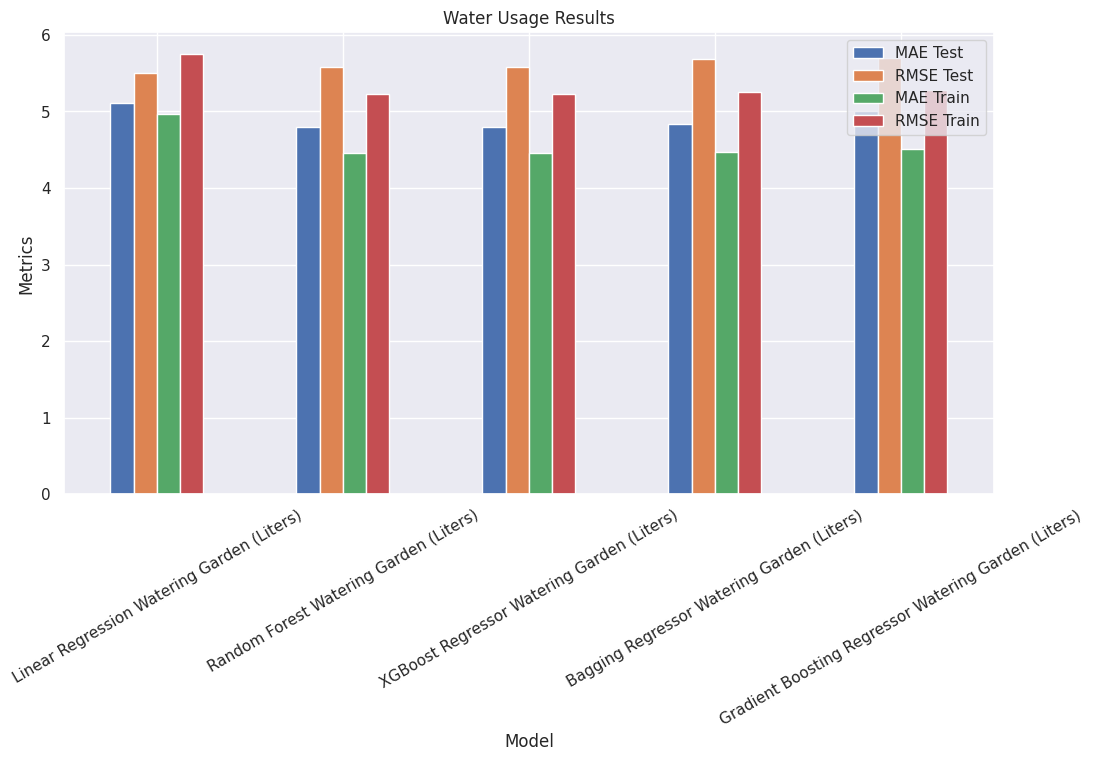

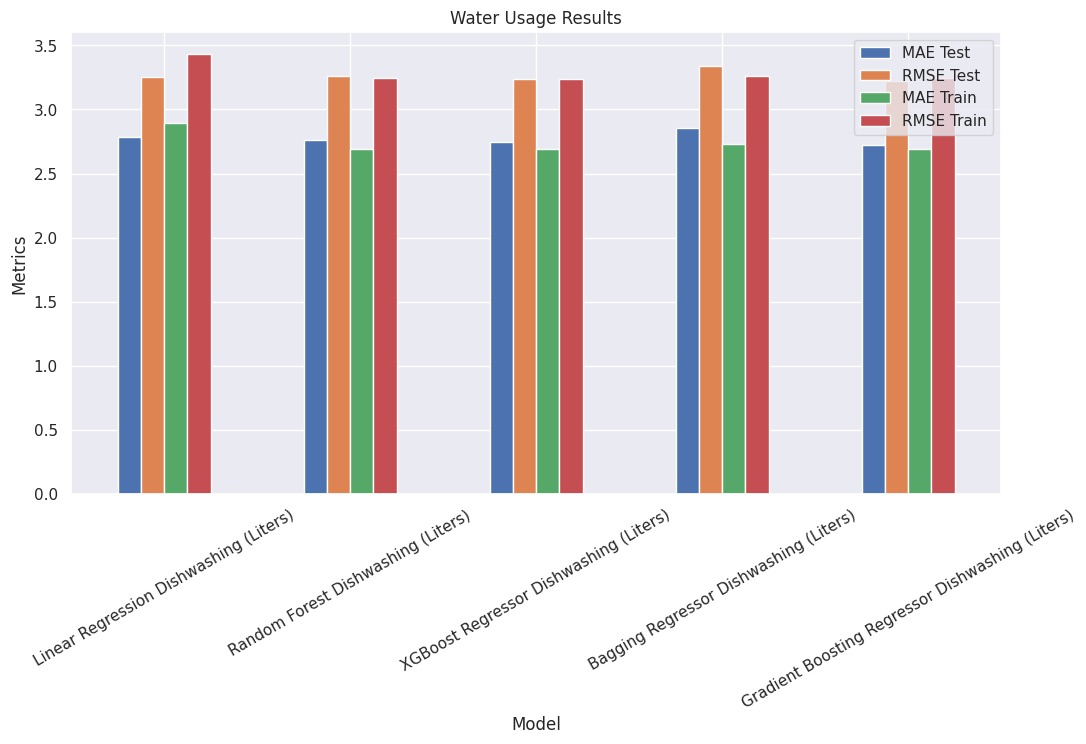

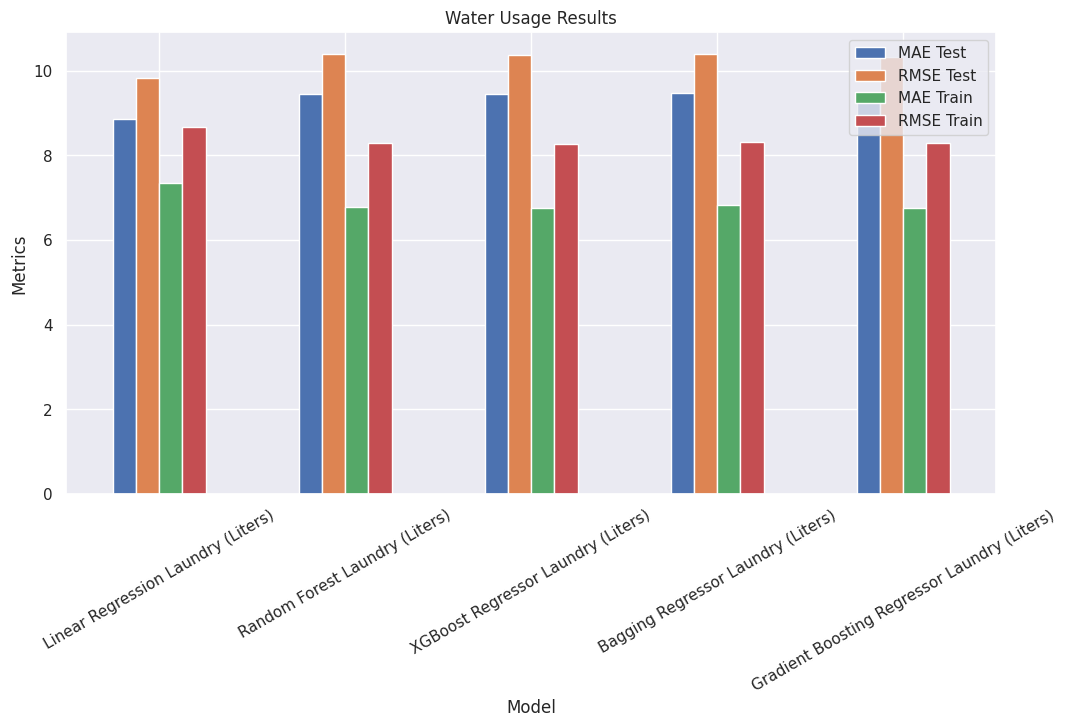

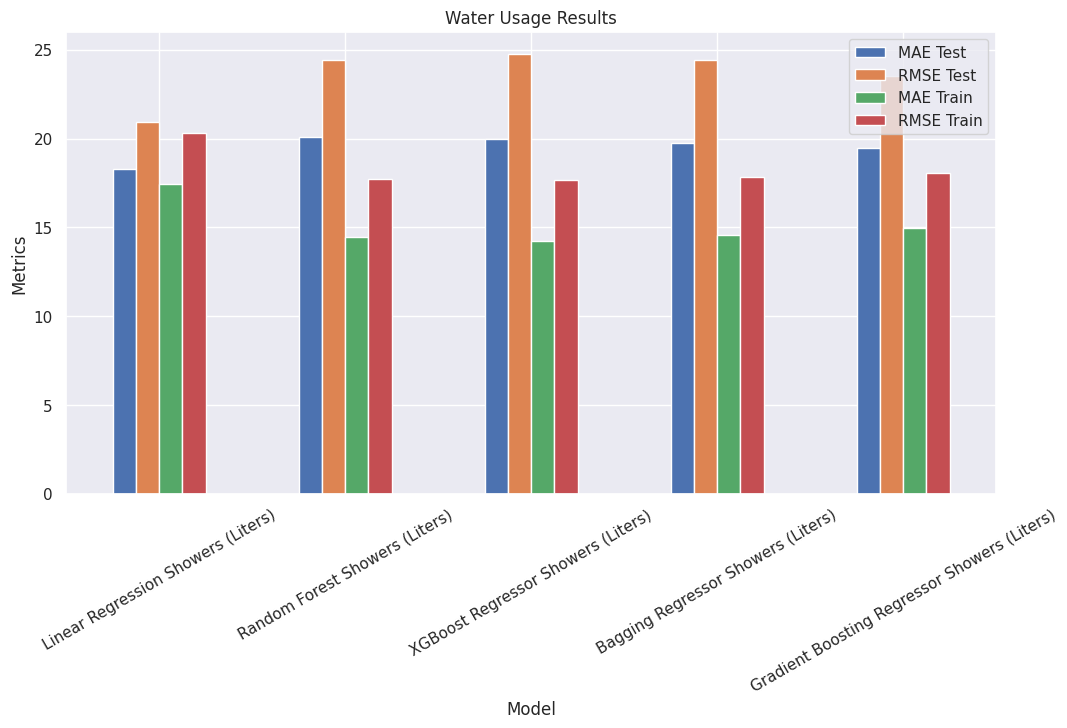

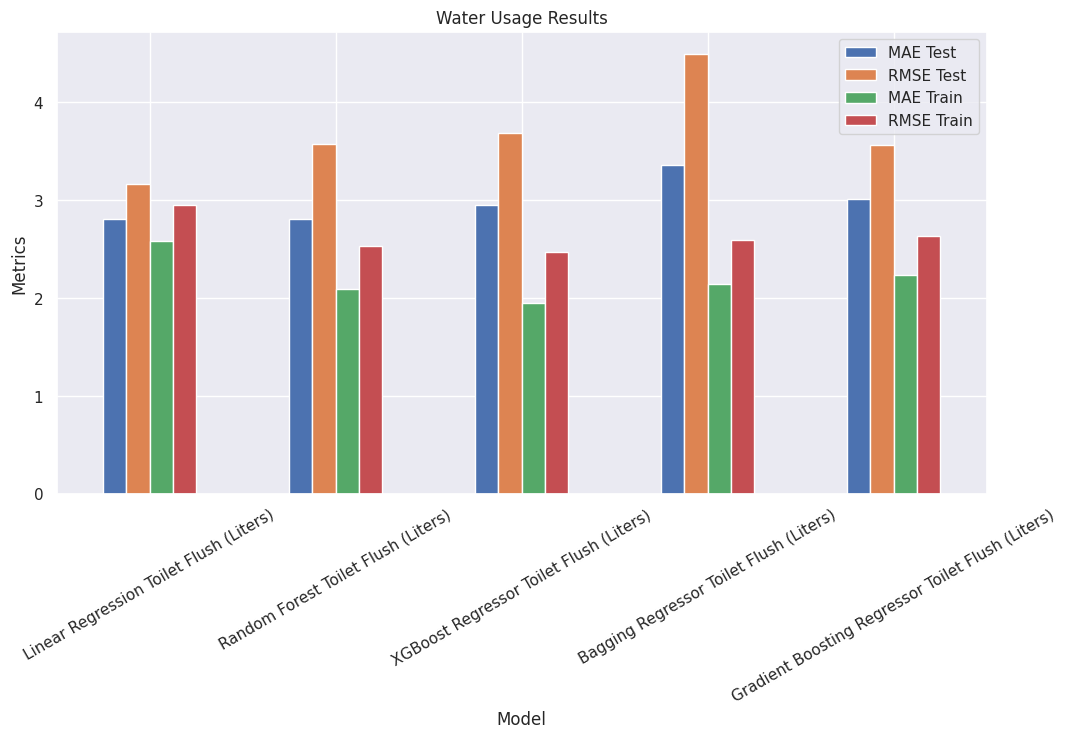

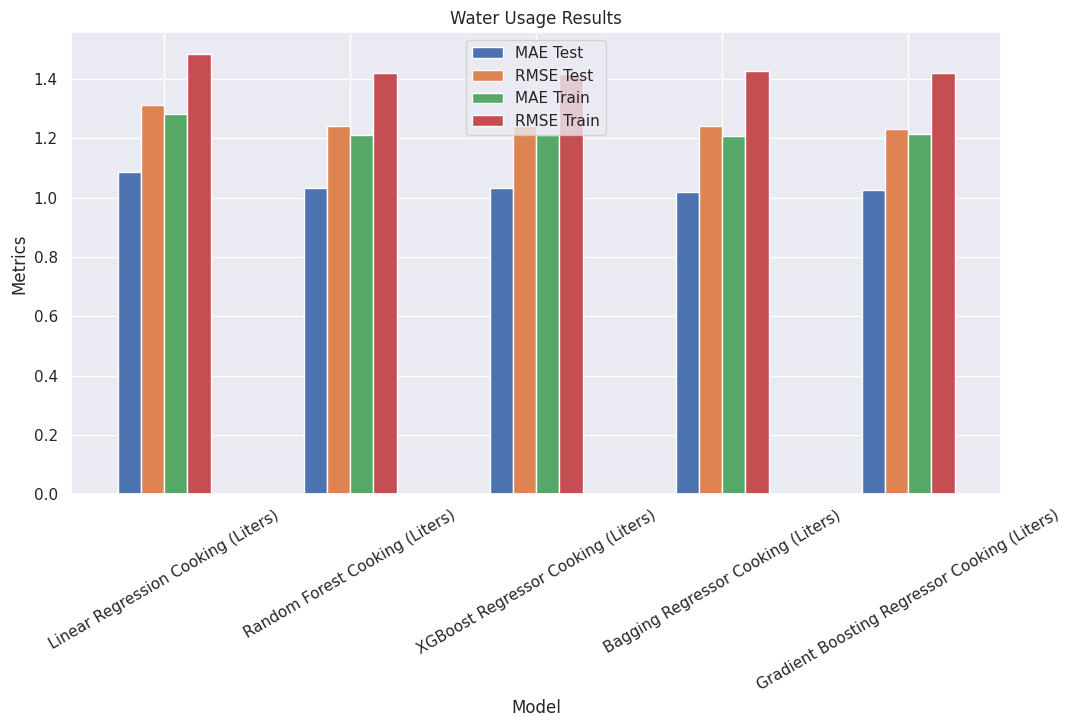

In [115]:
results_list = [water_results, dish_results, laundry_results, showers_results, toilet_results, cooking_results]
for results in results_list:
  result_df = pd.DataFrame(results, index=["MAE Test", "RMSE Test", "MAE Train", "RMSE Train"])
  result_df = result_df.T
  result_df.plot(kind="bar", figsize=(12, 6))
  plt.title("Water Usage Results")
  plt.xlabel("Model")
  plt.ylabel("Metrics")
  plt.xticks(rotation=30)

In [129]:
the_best_models = [water_forest_model, dish_forest_model, laundry_forest_model, showers_linear_model, toilet_forest_model, cooking_forest_model]
scalers_list = [water_sd_scaler, dish_sd_scaler, laundry_sd_scaler, showers_sd_scaler, toilet_sd_scaler, cooking_sd_scaler]
targets = ["Watering Garden (Liters)", "Dishwashing (Liters)", "Laundry (Liters)", "Showers (Liters)", "Toilet Flush (Liters)", "Cooking (Liters)"]
features = ["Watering Garden (Times)", "Dishwashing (Times)", "Laundry (Times)", "Showers (Times)", "Toilet Flush (Times)", "Cooking (Times)"]
datasets = [watering_df, dishwash_df, laundry_df, showers_df, toilet_df, cooking_df]
actual_water_usage = 0
total_pred_results = 0
for model, scaler, target, dataset, feature in zip(the_best_models, scalers_list, targets, datasets, features):
  sample_data = dataset.sample(1)
  X_sample = sample_data[["Family Size", feature]].values
  X_sample_scaled = scaler.transform(X_sample)
  predicted_water_usage = model.predict(X_sample_scaled)
  actual_water_usage += sample_data[target].values[0]
  total_pred_results += predicted_water_usage[0]
  print(f"Actual {target}: {sample_data[target].values[0]}")
  print(f"Predicted {target}: {predicted_water_usage[0]}")

Actual Watering Garden (Liters): 61.34113892107077
Predicted Watering Garden (Liters): 69.96469620070482
Actual Dishwashing (Liters): 19.35448399255779
Predicted Dishwashing (Liters): 18.207328980626336
Actual Laundry (Liters): 71.63233880626822
Predicted Laundry (Liters): 79.38058581572119
Actual Showers (Liters): 271.8096718700673
Predicted Showers (Liters): 245.55916234140307
Actual Toilet Flush (Liters): 54.82007728821876
Predicted Toilet Flush (Liters): 55.15624124958388
Actual Cooking (Liters): 11.456411154814852
Predicted Cooking (Liters): 12.223243420363959


In [131]:
actual_water_usage, total_pred_results

(490.41412203299774, 480.4912580084033)

In [144]:
sample_data = {"Family Size": [2], "Showers (Times)": [6]}

df = pd.DataFrame(sample_data)

X_sample = df.values

X_sample_scaled = showers_sd_scaler.transform(X_sample)

showers_linear_model.predict(X_sample_scaled)[0]

444.75095709340223

In [147]:
import joblib

file_names = ["water_forest_model", "dish_forest_model", "laundry_forest_model", "showers_linear_model", "toilet_forest_model", "cooking_forest_model"]
scaler_file_names = ["water_sd_scaler", "dish_sd_scaler", "laundry_sd_scaler", "showers_sd_scaler", "toilet_sd_scaler", "cooking_sd_scaler"]
for model, file_name, scaler, scaler_file_name in zip(the_best_models, file_names, scalers_list, scaler_file_names):
  joblib.dump(model, f"{file_name}.joblib")
  joblib.dump(scaler, f"{scaler_file_name}.joblib")

In [ ]:
joblib.dump(water_sd_scaler, "sd_scaler.joblib")

['sd_scaler.joblib']

In [ ]:
water_gradient_model = joblib.load("water_gradient_model.joblib")
sd_scaler = joblib.load("sd_scaler.joblib")
cooking_linear_model = joblib.load("cooking_linear_model.joblib")
dish_linear_model = joblib.load("dish_linear_model.joblib")
laundry_linear_model = joblib.load("laundry_linear_model.joblib")
showers_forest_model = joblib.load("showers_forest_model.joblib")
toilet_linear_model = joblib.load("toilet_linear_model.joblib")

In [ ]:
water_sd = joblib.load("water_sd_scaler.joblib")
dish_sd = joblib.load("dish_sd_scaler.joblib")
laundry_sd = joblib.load("laundry_sd_scaler.joblib")
showers_sd = joblib.load("showers_sd_scaler.joblib")
toilet_sd = joblib.load("toilet_sd_scaler.joblib")
cooking_sd = joblib.load("cooking_sd_scaler.joblib")

In [6]:
df2 = df2.drop_duplicates(subset=["Day", "Month"])
df2 = df2.sort_values(["Month", "Day"], ascending=[True, True])
df2.head()

,Day,Month,Temperature (°C),Family Size,Watering Garden (Liters),Dishwashing (Liters),Laundry (Liters),Cooking (Liters),Showers (Liters),Toilet Flush (Liters),Total Water Usage (Liters)
89,2,1,5.478519,3,7.613086,25.572454,93.738807,16.147898,369.124614,53.428872,565.625731
19,3,1,25.001556,3,73.758230,23.642196,8.479202,14.767214,190.353554,69.862924,380.863319
85,4,1,24.917851,3,49.587574,28.584710,65.616184,9.518979,379.425063,117.477727,650.210237
255,5,1,23.544401,5,93.621225,16.255315,56.533025,7.316896,154.704954,184.574334,513.005750
0,7,1,10.131169,1,23.295947,13.357589,68.813471,13.111906,132.475436,47.858261,298.912610


In [7]:
df2.shape

(242, 11)

In [ ]:
features = ['Family Size', 'Watering Garden (Liters)', 'Laundry (Liters)', 'Showers (Liters)', 'Toilet Flush (Liters)']
target = 'Total Water Usage (Liters)'
X = df2[features]
y = df2[target]


In [75]:
df3 = df2.drop(["Temperature (°C)"], axis=1)
df3.head()

,Day,Month,Family Size,Watering Garden (Liters),Dishwashing (Liters),Laundry (Liters),Cooking (Liters),Showers (Liters),Toilet Flush (Liters),Total Water Usage (Liters)
89,2,1,3,7.613086,25.572454,93.738807,16.147898,369.124614,53.428872,565.625731
19,3,1,3,73.758230,23.642196,8.479202,14.767214,190.353554,69.862924,380.863319
85,4,1,3,49.587574,28.584710,65.616184,9.518979,379.425063,117.477727,650.210237
255,5,1,5,93.621225,16.255315,56.533025,7.316896,154.704954,184.574334,513.005750
0,7,1,1,23.295947,13.357589,68.813471,13.111906,132.475436,47.858261,298.912610


In [31]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

X = df2[['Family Size']]
y = df2['Total Water Usage (Liters)']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

model = SARIMAX(y_train, exog=X_train, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
sarimax_result = model.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)


In [32]:
y_pred = sarimax_result.forecast(steps=len(X_test), exog=X_test)
y_pred[:10]

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


,predicted_mean
193,725.447209
194,300.315472
195,425.032146
196,356.474577
197,466.004492
198,384.691600
199,417.060123
200,390.329580
201,264.393456
202,617.655660


In [67]:
mean_absolute_error(y_test, y_pred), mean_squared_error(y_test, y_pred) ** (1/2)

(111.57859583945326, 157.24661807338006)

In [33]:
pd.DataFrame({"Predicted Values": y_pred, "Actual Values": y_test.values})

,Predicted Values,Actual Values
193,725.447209,708.321666
194,300.315472,265.243363
195,425.032146,443.069373
196,356.474577,351.991330
197,466.004492,480.943835
198,384.691600,253.125995
199,417.060123,411.365961
200,390.329580,395.003944
201,264.393456,187.882360
202,617.655660,415.954676


In [112]:
df3 = df2.copy()
df3['Date'] = pd.to_datetime(df3[['Month', 'Day']].assign(Year=2020), errors='coerce')
df3.head()

,Day,Month,Temperature (°C),Family Size,Watering Garden (Liters),Dishwashing (Liters),Laundry (Liters),Cooking (Liters),Showers (Liters),Toilet Flush (Liters),Total Water Usage (Liters),Date
89,2,1,5.478519,3,7.613086,25.572454,93.738807,16.147898,369.124614,53.428872,565.625731,2020-01-02
19,3,1,25.001556,3,73.758230,23.642196,8.479202,14.767214,190.353554,69.862924,380.863319,2020-01-03
85,4,1,24.917851,3,49.587574,28.584710,65.616184,9.518979,379.425063,117.477727,650.210237,2020-01-04
255,5,1,23.544401,5,93.621225,16.255315,56.533025,7.316896,154.704954,184.574334,513.005750,2020-01-05
0,7,1,10.131169,1,23.295947,13.357589,68.813471,13.111906,132.475436,47.858261,298.912610,2020-01-07


In [38]:
!pip install prophet

In [113]:
df_prophet = df3[['Date', 'Total Water Usage (Liters)']].rename(columns={'Date': 'ds', 'Total Water Usage (Liters)': 'y'})
df_prophet.head()

,ds,y
89,2020-01-02,565.625731
19,2020-01-03,380.863319
85,2020-01-04,650.210237
255,2020-01-05,513.005750
0,2020-01-07,298.912610


In [114]:
df_prophet.dropna(inplace=True)

In [115]:
from prophet import Prophet

model = Prophet()
model.fit(df_prophet)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpd3mjxt1y/6sd6j4r9.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpd3mjxt1y/ps3l09jf.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=13839', 'data', 'file=/tmp/tmpd3mjxt1y/6sd6j4r9.json', 'init=/tmp/tmpd3mjxt1y/ps3l09jf.json', 'output', 'file=/tmp/tmpd3mjxt1y/prophet_modelt5ia7c4k/prophet_model-20241008173708.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
17:37:08 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
17:37:08 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [116]:
future = model.make_future_dataframe(periods=30)
future

,ds
0,2020-01-02
1,2020-01-03
2,2020-01-04
3,2020-01-05
4,2020-01-07
...,...
264,2021-01-26
265,2021-01-27
266,2021-01-28
267,2021-01-29


In [117]:
forecast = model.predict(future)
# pd.DataFrame({"Date": df3.head(30)["Day"].values, "Actual Data": df3.head(30)["Total Water Usage (Liters)"].values, "Prediction": forest.yhat.values})

In [118]:
mean_absolute_error(df3[:180]["Total Water Usage (Liters)"].values, forecast[:180].yhat.values)

198.31437406199333

<Axes: xlabel='ds'>

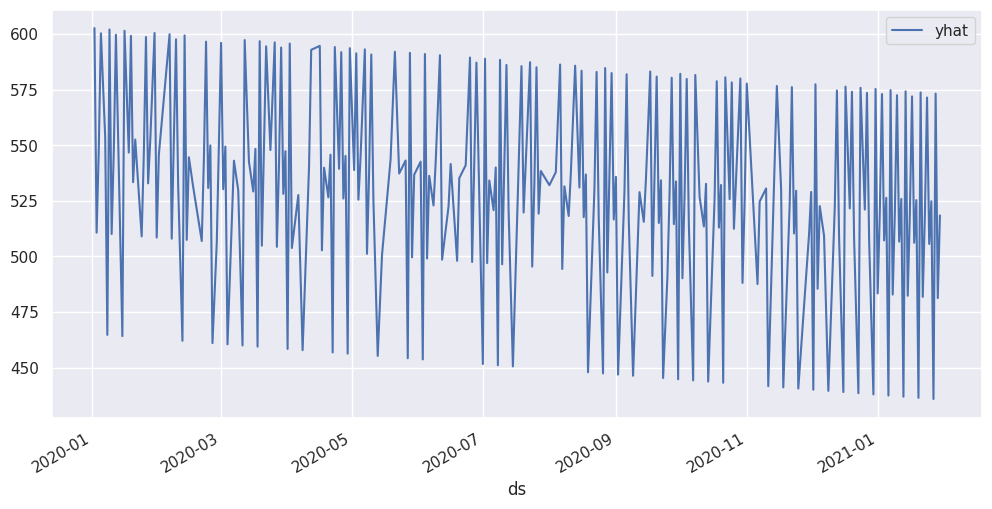

In [119]:
forecast[['ds', 'yhat']].set_index('ds').plot(figsize=(12, 6))

In [130]:
pd.DataFrame({"Date": df3[:30]["Day"].values, "Actual Data": df3[:30]["Total Water Usage (Liters)"].values, "Prediction": forecast[:30].yhat.values, "Ds": forecast[:30].ds.values})

,Date,Actual Data,Prediction,Ds
0,2,565.625731,602.641786,2020-01-02
1,3,380.863319,510.690816,2020-01-03
2,4,650.210237,547.836887,2020-01-04
3,5,513.005750,600.305206,2020-01-05
4,7,298.912610,553.636602,2020-01-07
5,8,209.376832,464.690104,2020-01-08
6,9,477.097980,602.013854,2020-01-09
7,10,327.665572,510.062884,2020-01-10
8,11,445.855719,547.208955,2020-01-11
9,12,763.742009,599.692179,2020-01-12


In [145]:
total_actual_usage = df3[150:180]["Total Water Usage (Liters)"].sum()
pred_usage =  forecast[150:180]["yhat"].sum()
print("Total Actual usage", total_actual_usage , "Liters")
print("Total Predicted usage", pred_usage, "Liters")

Total Actual usage 15151.86813317274 Liters
Total Predicted usage 15579.14278093122 Liters


In [140]:
df3[:30][["Total Water Usage (Liters)"]].sum()

,0
Total Water Usage (Liters),15635.940375


In [121]:
import joblib

joblib.dump(model, "mothly_water_usage_model.joblib")

['mothly_water_usage_model.joblib']

In [128]:
loaded_model = joblib.load("mothly_water_usage_model.joblib")

data = loaded_model.make_future_dataframe(periods=12, freq='M')
data

/usr/local/lib/python3.10/dist-packages/prophet/forecaster.py:1854: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(


,ds
0,2020-01-02
1,2020-01-03
2,2020-01-04
3,2020-01-05
4,2020-01-07
...,...
246,2021-08-31
247,2021-09-30
248,2021-10-31
249,2021-11-30


In [127]:
pred = loaded_model.predict(data)
pred

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-01-02,545.164959,272.152317,914.101549,545.164959,545.164959,57.476827,57.476827,57.476827,57.476827,57.476827,57.476827,0.0,0.0,0.0,602.641786
1,2020-01-03,545.075254,195.810850,802.757981,545.075254,545.075254,-34.384438,-34.384438,-34.384438,-34.384438,-34.384438,-34.384438,0.0,0.0,0.0,510.690816
2,2020-01-04,544.985550,239.646817,849.890615,544.985550,544.985550,2.851337,2.851337,2.851337,2.851337,2.851337,2.851337,0.0,0.0,0.0,547.836887
3,2020-01-05,544.895845,285.605922,920.671692,544.895845,544.895845,55.409361,55.409361,55.409361,55.409361,55.409361,55.409361,0.0,0.0,0.0,600.305206
4,2020-01-07,544.716436,267.209286,867.348506,544.716436,544.716436,8.920167,8.920167,8.920167,8.920167,8.920167,8.920167,0.0,0.0,0.0,553.636602
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
264,2021-01-26,515.859430,218.576061,848.229535,515.839454,515.877190,8.920167,8.920167,8.920167,8.920167,8.920167,8.920167,0.0,0.0,0.0,524.779596
265,2021-01-27,515.784631,130.388869,758.063608,515.763494,515.803326,-79.936628,-79.936628,-79.936628,-79.936628,-79.936628,-79.936628,0.0,0.0,0.0,435.848004
266,2021-01-28,515.709833,241.400464,868.383985,515.687503,515.729926,57.476827,57.476827,57.476827,57.476827,57.476827,57.476827,0.0,0.0,0.0,573.186660
267,2021-01-29,515.635035,155.687432,771.248236,515.611325,515.656278,-34.384438,-34.384438,-34.384438,-34.384438,-34.384438,-34.384438,0.0,0.0,0.0,481.250597
